In [1]:
import numpy as np

# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.tree import DecisionTreeClassifier

In [2]:
from zipfile import ZipFile
zip_file = ZipFile('data/titanic.zip')

data_train = pd.read_csv(zip_file.open('train.csv'))
data_test = pd.read_csv(zip_file.open('test.csv'))
data_gender = pd.read_csv(zip_file.open('gender_submission.csv'))

In [3]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
alldata = [data_train, data_test]

In [6]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data_train.corr()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [8]:
data_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [9]:
data_train.columns.values.shape

(12,)

In [10]:
data_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [11]:
data_train['Embarked'].isna().sum()

2

In [12]:
common_value = 'S'

for dataset in alldata:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [13]:
data_train['Embarked'].isna().sum()

0

In [14]:
for dataset in alldata:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [15]:
genders = {'male': 0, 'female': 1}

for dataset in alldata:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [16]:
ports = {"S": 0, "C": 1, "Q": 2}

for dataset in alldata:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [17]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8,NaN,0


In [18]:
data_train = data_train.drop(['PassengerId','Name','Ticket','Cabin','Fare'], axis=1)
data_test  = data_test.drop(['PassengerId','Name','Ticket','Cabin','Fare'], axis=1)

In [19]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


In [20]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,34.5,0,0,2
1,3,1,47.0,1,0,0
2,2,0,62.0,0,0,2
3,3,0,27.0,0,0,0
4,3,1,22.0,1,1,0


In [21]:
data_test.insert(loc=0, column='Survived', value=data_gender['Survived'].values)

In [22]:
data_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,34.5,0,0,2
1,1,3,1,47.0,1,0,0
2,0,2,0,62.0,0,0,2
3,0,3,0,27.0,0,0,0
4,1,3,1,22.0,1,1,0


In [23]:
data_test.shape

(418, 7)

In [24]:
data_train['Age'].isna().sum()

177

In [25]:
np.random.seed(0)

In [26]:
mean = data_train["Age"].mean()
std = data_train["Age"].std()
list_isna = data_train['Age'].isna()
for line in range(list_isna.shape[0]):
    if(list_isna[line]==True):
      #print("Antes",line,data_train.iloc[line]["Age"])
      rand_age = np.random.randint(mean - std, mean + std, 1)
      #print(rand_age)
      data_train.at[line,'Age']=rand_age
      #print("Depois",line,data_train.iloc[line]["Age"])


In [27]:
data_train["Age"].isnull().sum()

0

In [28]:
data_test["Age"].isnull().sum()

86

In [29]:
mean = data_test["Age"].mean()
std = data_test["Age"].std()
list_isna = data_test['Age'].isna()
for line in range(list_isna.shape[0]):
    if(list_isna[line]==True):
      #print("Antes",line,data_test.iloc[line]["Age"])
      rand_age = np.random.randint(mean - std, mean + std, 1)
      #print(rand_age)
      data_test.at[line,'Age']=rand_age
      #print("Depois",line,data_test.iloc[line]["Age"])

In [30]:
data_test["Age"].isnull().sum()

0

In [31]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


In [32]:
data_train["Age"] = data_train["Age"].astype(int)
data_test["Age"] = data_test["Age"].astype(int)

In [33]:
X = data_train.drop(['Age'], axis=1).values
Y = data_train['Age'].values

In [ ]:
#https://mljar.com/blog/visualize-decision-tree/

In [34]:
attributes = data_train.columns.values.tolist()
del attributes[0]
print(attributes)

#decisoes = np.unique(data_train['Survived'].values).tolist()
#print(decisoes)
#decisoes = map(str, decisoes)
#print(decisoes)
decisoes = ['0','1']


['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']


1- juntar todos os dados em apenas uma planilha;

2- separar os dados em k-folds; pego a base separo em  partes e faço k rodadas experiementais (testes), treino de p1 a p6, dps testo em p7, dps de p1 a p5, + p7 no treino e p6 no teste;

3- realizar tarefa de regressão de AGE utilizando modelos lineares adotando L2 como função utilidade;
4- Utilizar as medidas de avaliação MAE e MAPE;

5- Criar gráficos de barras;

6- Comparar com o algoritmo de árvores de regressão;

In [35]:
full_data = pd.concat([data_train, data_test])
full_data.shape

(1309, 7)

In [36]:
# as idades zero estao atrapalhando o mae e mape, vamos considera-las como 1
nulls = np.where(full_data['Age'] == 0)
full_data = full_data.drop(full_data.index[nulls])
print(full_data.shape)
full_data.values[nulls] = 1

(1290, 7)


In [37]:
from sklearn.model_selection import KFold

# A validação cruzada permite analisar mais precisamente
# a capacidade de generalização de um modelo. Podemos
# identificar possíveis problemas de overfitting e comparar
# diferentes modelos para escolher o melhor na resolução
# daquele problema
kf = KFold(n_splits=5,random_state=0,shuffle=True)

In [38]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

X_test_list = []
Y_test_list = []
X_train_list = []
Y_train_list = []
mape_list_reg = []
mae_list_reg = []
mse_list_reg = []
mape_list_tree = []
mae_list_tree = []
mse_list_tree = []

for i, (train_index, test_index) in enumerate(kf.split(full_data)):
  print(f"Fold {i}:")
  print(f"  Train Size={train_index.shape}")
  print(f"  Test Size={test_index.shape}")
  #print(f"  Train: index={train_index}")
  #print(f"  Test:  index={test_index}")

  Y_test = full_data.values[test_index][:,3]
  X_test = full_data.values[test_index]
  X_test = np.delete(X_test, 3,1)

  Y_train = full_data.values[train_index][:,3]
  X_train = full_data.values[train_index]
  X_train = np.delete(X_train, 3,1)

  reg = linear_model.Lasso(alpha=0.1)
  reg.fit(X_train, Y_train)
  Y_pred = reg.predict(X_test)

  #print("X_test: ", X_test)
  #print("Y_test: ", Y_test)
  #print("X_train: ", X_train)
  #print("Y_train: ", Y_train)
  #X_test_list.append(X_test)
  #Y_test_list.append(Y_test)
  #X_train_list.append(X_train)
  #Y_train_list.append(Y_train)
  mape = mean_absolute_percentage_error(Y_test, Y_pred)
  mape_list_reg.append(mape)
  mae = mean_absolute_error(Y_test, Y_pred)
  mae_list_reg.append(mae)
  mse = mean_squared_error(Y_test, Y_pred)
  mse_list_reg.append(mse)
  #print(Y_pred)
  print("(Reg) MAPE: ", mape)
  print("(Reg) MAE: ", mae)
  print("(Reg) MSE: ", mse)

  tree = DecisionTreeRegressor(random_state=0)
  tree.fit(X_train, Y_train)
  Y_pred = tree.predict(X_test)

  mape = mean_absolute_percentage_error(Y_test, Y_pred)
  mape_list_tree.append(mape)
  mae = mean_absolute_error(Y_test, Y_pred)
  mae_list_tree.append(mae)
  mse = mean_squared_error(Y_test, Y_pred)
  mse_list_tree.append(mse)
  #print(Y_pred)
  print("(Tree) MAPE: ", mape)
  print("(Tree) MAE: ", mae)
  print("(Tree) MSE: ", mse)


Fold 0:
  Train Size=(1032,)
  Test Size=(258,)
(Reg) MAPE:  0.46810713291410316
(Reg) MAE:  9.19631809107311
(Reg) MSE:  127.54197481617697
(Tree) MAPE:  0.443821611688614
(Tree) MAE:  9.632533199039868
(Tree) MSE:  146.65362688734362
Fold 1:
  Train Size=(1032,)
  Test Size=(258,)
(Reg) MAPE:  0.8414644869215903
(Reg) MAE:  9.508739204582799
(Reg) MSE:  151.3731558562997
(Tree) MAPE:  0.6696135229965153
(Tree) MAE:  9.391337211278326
(Tree) MSE:  149.88176020708974
Fold 2:
  Train Size=(1032,)
  Test Size=(258,)
(Reg) MAPE:  0.9067820439793078
(Reg) MAE:  9.795696189046696
(Reg) MSE:  155.20877294208128
(Tree) MAPE:  0.6567117641579394
(Tree) MAE:  9.118168365209097
(Tree) MSE:  139.09996847724446
Fold 3:
  Train Size=(1032,)
  Test Size=(258,)
(Reg) MAPE:  0.6355362012892148
(Reg) MAE:  9.082998272585783
(Reg) MSE:  124.93405635807885
(Tree) MAPE:  0.5630325054038676
(Tree) MAE:  9.169185972967368
(Tree) MSE:  134.2904769174113
Fold 4:
  Train Size=(1032,)
  Test Size=(258,)
(Reg) M

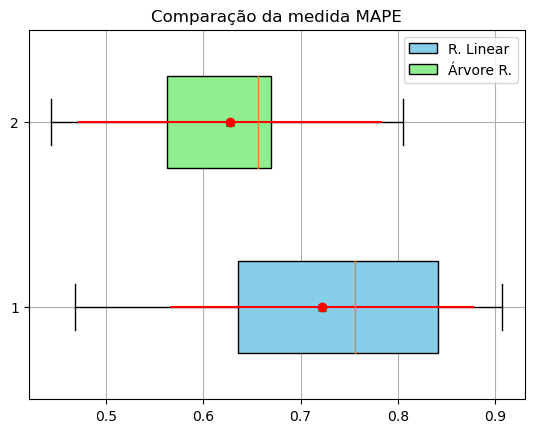

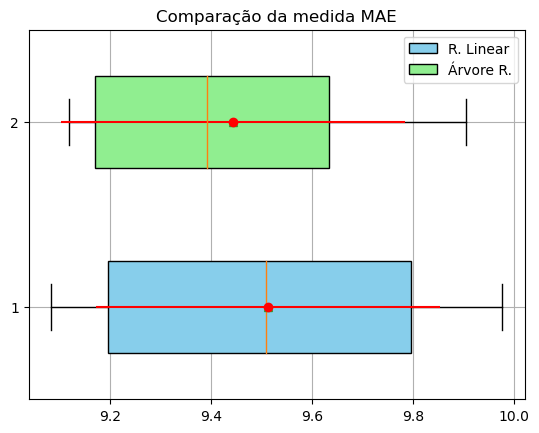

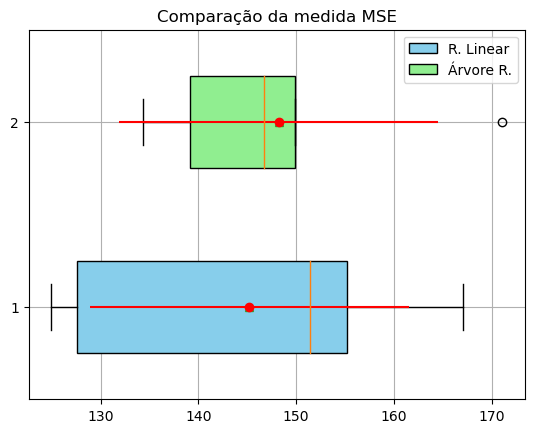

In [39]:
std_mape_reg = np.std(mape_list_reg)
mean_mape_reg = np.mean(mape_list_reg)
std_mae_reg = np.std(mae_list_reg)
mean_mae_reg = np.mean(mae_list_reg)
std_mse_reg = np.std(mse_list_reg)
mean_mse_reg = np.mean(mse_list_reg)
std_mape_tree = np.std(mape_list_tree)
mean_mape_tree = np.mean(mape_list_tree)
std_mae_tree = np.std(mae_list_tree)
mean_mae_tree = np.mean(mae_list_tree)
std_mse_tree = np.std(mse_list_tree)
mean_mse_tree = np.mean(mse_list_tree)

# Configurar o gráfico MAPE
fig, ax = plt.subplots()
ax.grid(True)

# Ploto candlestick para o primeiro conjunto de dados
bp1 = ax.boxplot(mape_list_reg, vert=False, patch_artist=True, positions=[1], showmeans=True, widths=0.5, boxprops=dict(facecolor="skyblue"), whiskerprops=dict(color="black"))

# Ploto candlestick para o segundo conjunto de dados
bp2 = ax.boxplot(mape_list_tree, vert=False, patch_artist=True, positions=[2], showmeans=True, widths=0.5, boxprops=dict(facecolor="lightgreen"), whiskerprops=dict(color="black"))

# Adiciono média e desvio padrão
ax.errorbar(mean_mape_reg, 1, xerr=std_mape_reg, fmt='o', color='red')
ax.errorbar(mean_mape_tree, 2, xerr=std_mape_reg, fmt='o', color='red')

ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['R. Linear', 'Árvore R.'])

ax.set_title('Comparação da medida MAPE')

plt.show()

# Configurar o gráfico MAE
fig, ax = plt.subplots()
ax.grid(True)

# Ploto candlestick para o primeiro conjunto de dados
bp1 = ax.boxplot(mae_list_reg, vert=False, patch_artist=True, positions=[1], showmeans=True, widths=0.5, boxprops=dict(facecolor="skyblue"), whiskerprops=dict(color="black"))

# Ploto candlestick para o segundo conjunto de dados
bp2 = ax.boxplot(mae_list_tree, vert=False, patch_artist=True, positions=[2], showmeans=True, widths=0.5, boxprops=dict(facecolor="lightgreen"), whiskerprops=dict(color="black"))

# Adiciono média e desvio padrão
ax.errorbar(mean_mae_reg, 1, xerr=std_mae_reg, fmt='o', color='red')
ax.errorbar(mean_mae_tree, 2, xerr=std_mae_reg, fmt='o', color='red')

ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['R. Linear', 'Árvore R.'])

ax.set_title('Comparação da medida MAE')

plt.show()

# Configurar o gráfico MSE
fig, ax = plt.subplots()
ax.grid(True)

# Ploto candlestick para o primeiro conjunto de dados
bp1 = ax.boxplot(mse_list_reg, vert=False, patch_artist=True, positions=[1], showmeans=True, widths=0.5, boxprops=dict(facecolor="skyblue"), whiskerprops=dict(color="black"))

# Ploto candlestick para o segundo conjunto de dados
bp2 = ax.boxplot(mse_list_tree, vert=False, patch_artist=True, positions=[2], showmeans=True, widths=0.5, boxprops=dict(facecolor="lightgreen"), whiskerprops=dict(color="black"))

# Adiciono média e desvio padrão
ax.errorbar(mean_mse_reg, 1, xerr=std_mse_reg, fmt='o', color='red')
ax.errorbar(mean_mse_tree, 2, xerr=std_mse_reg, fmt='o', color='red')

ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['R. Linear', 'Árvore R.'])

ax.set_title('Comparação da medida MSE')

plt.show()

# Pós Processamento

**MAPE:** O Erro Percentual Absoluto Médio da Árvore de Decisão é bem menor do que o MAPE do modelo de Regressão Linear, indica melhor desempenho em prever valores de idade.

**MAE:** Perceba que o Erro Absoluto Médio da Árvore de Decisão é menor do que o MAE do modelo de Regressão Linear, ou seja, a Árvore pontua novamente com melhor desempenho. Perceba também que temos um Outlier no MAE da Árvore de Decisão, ele pode afetar o desempenho do modelo negativamente por indicar possível enviesamento.

**MSE:** Observa-se que o erro quadrático médio da Árvore de Decisão é bem menor do que o da Regressão Linear, o que é um indicativo de melhor desempenho do primeiro modelo na tarefa de regressão. Perceba que também temos um Outlier no MSE da Árvore de Decisão, ele pode afetar o desempenho do modelo negativamente por indicar possível enviesamento.

Com isso, podemos concluir que a Árvore de Decisão numa tarefa de regressão para resolver o problema de prever idades do conjunto do titanic parece ter um desempenho melhor em prever valores contínuos do que o modelo de Regressão Linear, que possui muito mais dispersão nos valores de erro.